<a href="https://colab.research.google.com/github/cuentadesanti/RealEstate/blob/main/DD360TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reto obligatorio

In [ ]:
pip install nl2query

In [ ]:
from nl2query import PandasQuery
import pandas as pd

In [ ]:
#cargar csv
listings = pd.read_csv('/content/sample_data/listings.csv')
listings['has_terrace'] = listings['has_terrace'].fillna(0)

In [ ]:
#entrenar nlp2query
queryfier = PandasQuery(listings, 'listings')

In [ ]:
queryfier.generate_query("What is the average price of apartments with pool?", top_p = 1)

"listings2.loc[listings2['has_pool']=='1', 'last_price'].mean()"

In [ ]:
exec("ans="+queryfier.generate_query("What is the average price of apartments with pool?"))
print(ans)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


nan


In [ ]:
queryfier.generate_query("What is the average price of apartments with pool?", top_p = 1)

"listings.loc[listings['has_pool']=='1', 'last_price'].mean()"

In [ ]:
#fixing pool and terrace
def clean_query(prompt):
    qstr = queryfier.generate_query(prompt, top_p = 1)

    if "'has_pool'" in qstr or "'has_terrace'" in qstr:

        for i in ["'no'", "'NO'", "'n'", "'N'", "'0'","'True'","'T'","'t'","'TRUE'"]:
            qstr = qstr.replace(i, "0")
        for i in ["'yes'", "'YES'", "'y'", "'Y'", "'1'","'False'","'F'","'f'","'FALSE'"]:
            qstr = qstr.replace(i, "1")
    if "'sale'" in qstr: qstr = qstr.replace("'sale'","'for-sale'")
    elif "'rent'" in qstr: qstr = qstr.replace("'rent'","'for-rent'")

    return qstr


In [ ]:
cq = clean_query("What is the average price of apartments with pool?")
exec("ans="+cq)
ans

5057512.241413626

Debraye para apartment v house


In [ ]:
#cargar csv
listings2 = pd.read_csv('/content/sample_data/listings2.csv')

In [ ]:
#entrenar nlp2query
queryfier2 = PandasQuery(listings2, 'listings2')

In [ ]:
queryfier2.generate_query("What is the average price of listings that is apartment with pool?", top_p = 1)

"listings2.loc[listings2['has_apartment'] == '1', 'last_price'].mean()"

In [ ]:
#fixing ap, ho, pool and terrace
def clean_query2(prompt):
    qstr = queryfier.generate_query(prompt, top_p = 1)

    if "'has_pool'" in qstr or "'has_terrace'" in qstr:

        for i in ["'no'", "'NO'", "'n'", "'N'", "'0'","'True'","'T'","'t'","'TRUE'"]:
            qstr = qstr.replace(i, "0")
        for i in ["'yes'", "'YES'", "'y'", "'Y'", "'1'","'False'","'F'","'f'","'FALSE'"]:
            qstr = qstr.replace(i, "1")
    if "'sale'" in qstr: qstr = qstr.replace("'sale'","'for-sale'")
    elif "'rent'" in qstr: qstr = qstr.replace("'rent'","'for-rent'")

    return qstr


Traductor

In [ ]:
pip install translate

In [ ]:
from translate import Translator

In [ ]:
translator= Translator(from_lang="es",to_lang="en")
translation = translator.translate("Pluma.")

In [ ]:
translation

'Feather.'

In [ ]:
quest = translator.translate("¿Cuál es el precio promedio de los departamentos en venta?")
quest

'What is the average price of apartments for sale?'

In [ ]:
queryfier.generate_query(quest)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


"listings.loc[lambda x: x['property_type']=='sale', 'last_price'].mean()"

In [ ]:
clean_query(quest)

"listings.loc[lambda x: x['property_type']=='for-sale', 'last_price'].mean()"

In [ ]:
cq = clean_query(quest)
exec("ans="+cq.replace("'property_type'","'listing_type'"))
ans

7884095.444837818

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
inputs = tokenizer("write as a full sentence including the question: how much is the department? 7 dollars.", return_tensors="pt")
outputs = model.generate(**inputs)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

['The department is $7.']


In [ ]:
inputs = tokenizer("write as a full sentence including the question adding units (dollars or square feet):"+quest+str(ans), return_tensors="pt")
outputs = model.generate(**inputs)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

['The average price of apartments for sale is 7884095.444837818.']


In [ ]:
def eng_answer(question, answer):
  inputs = tokenizer("write as a full sentence including the question:" + question + str(answer), return_tensors="pt")
  outputs = model.generate(**inputs)
  return tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

In [ ]:
eng_answer(quest,str(ans))

'The average price of apartments for sale is 7884095.444837818.'

In [ ]:
translator2= Translator(from_lang="en",to_lang="es")

In [ ]:
def full_send(prompt, debug=False):
    quest = translator.translate(prompt)
    clq = clean_query(queryfier.generate_query(quest))
    if debug:
        print(clq)
        clq = input("")
    if "'sale'" in clq: clq=clq.replace("'property_type'", "'listing_type'")
    exec("global ans\nans=" + clq)
    eng_ans = eng_answer(quest, str(ans))
    translated_answer = translator2.translate(eng_ans)
    return translated_answer


In [ ]:
full_send("¿Cuál es el precio promedio de los departamentos en venta?")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'El precio medio de los apartamentos en venta es de 7884095.444837818.'

In [ ]:
full_send("¿Cuál es el precio promedio de casa sin terraza?")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'El precio medio de una casa sin terraza es 5292909.5709728'

0       NaN
1       1.0
2       1.0
3       NaN
4       1.0
       ... 
3281    1.0
3282    NaN
3283    1.0
3284    NaN
3285    NaN
Name: has_terrace, Length: 3286, dtype: float64

Reto opcional:

●	Como un científico de datos, tu misión es predecir el tiempo que una propiedad está en el mercado. Establece la métrica con la que vas a evaluar dicha predicción. ¿Cómo se ve tu análisis para las propiedades que aún no se venden contra las que ya se vendieron?

○	Nota: El tiempo que una propiedad está en el mercado está en la columna time2event, el cual está medido en días, y si se vendió o no la propiedad está en event, marcado con 1 o 0, respectivamente.

○	El archivo se llama liquidity_challenge


In [1]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 8.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=444bd3d003c42dd63c04f4cc8ed1a443f8669d3fce1d777450dfe77fb15705db
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [70]:
from lifelines import CoxPHFitter, KaplanMeierFitter
import pandas as pd

# Load your data
data = pd.read_csv("/content/sample_data/liquidity_challenge.csv")

# Preprocess the data
data = data.dropna()
data_encoded = pd.get_dummies(data[['time2event','event','surface_total','views','property_type','has_pool']], columns=['property_type'], drop_first=True)

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data_encoded, duration_col='time2event', event_col='event')

# Display the model summary
print(cph.summary)

                         coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                            
surface_total       -0.000843   0.999157  0.000197       -0.001229   
views                0.001031   1.001032  0.001053       -0.001034   
has_pool            -0.133836   0.874733  0.056779       -0.245121   
property_type_house  0.172242   1.187965  0.061245        0.052203   

                     coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                       
surface_total             -0.000457             0.998772             0.999543   
views                      0.003096             0.998967             1.003101   
has_pool                  -0.022551             0.782610             0.977701   
property_type_house        0.292280             1.053590             1.339479   

                     cmp to         z         p   -log2(p)  
covariate                      

In [71]:
# Calculate the median life
data_encoded['pred_med'] = cph.predict_median(data_encoded)


In [72]:
data_encoded.groupby('event')['pred_med'].mean()

event
0    76.704740
1    75.573501
Name: pred_med, dtype: float64

In [4]:
CoxPHFitter.check_assumptions(cph,training_df=data_encoded,advice=True)

Proportional hazard assumption looks okay.


[]

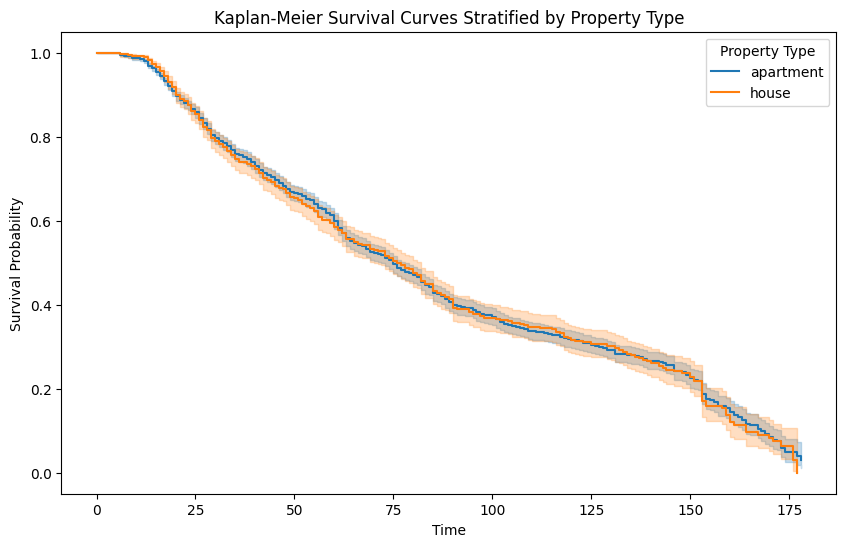

76.0

In [9]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Assuming 'data' is your DataFrame, including a 'property_type' column

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for property_type in data['property_type'].unique():
    # Select data for each property type
    idx = data['property_type'] == property_type
    kmf.fit(data[idx]['time2event'], event_observed=data[idx]['event'], label=property_type)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by Property Type')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Property Type')
plt.show()


kmf.median_survival_time_

median for 2.5 90.0
median for 2.0 73.0
median for 1.0 68.0
median for 3.5 135.0
median for 3.0 77.0
median for 4.5 95.0
median for 4.0 80.0
median for 1.5 95.0
median for 15.0 inf
median for 5.5 inf
median for 5.0 82.0
median for 6.0 82.0


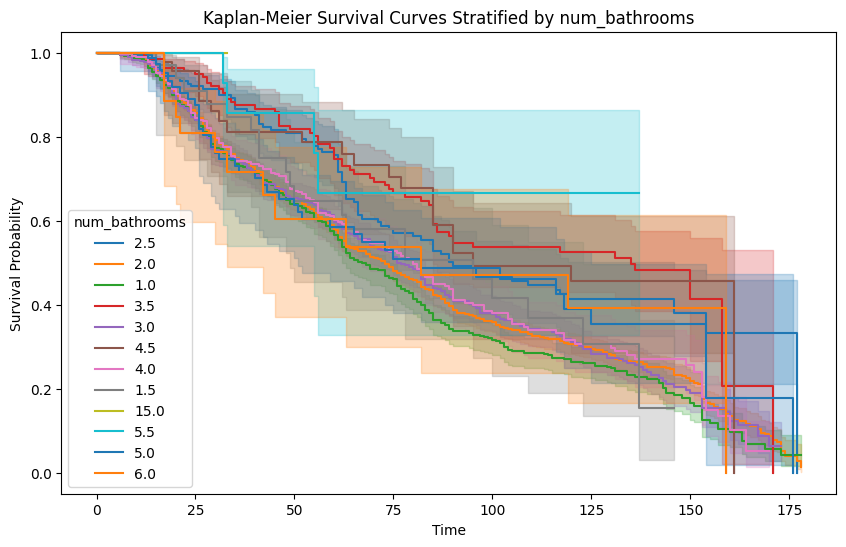

In [13]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for num_bath in data['num_bathrooms'].unique():
    # Select data for each property type
    idx = data['num_bathrooms'] == num_bath
    kmf.fit(data[idx]['time2event'], event_observed=data[idx]['event'], label=num_bath)
    kmf.plot_survival_function()
    print("median for "+str(num_bath),kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified by num_bathrooms')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='num_bathrooms')
plt.show()

median for 2.0 73.0
median for 1.0 74.0
median for 3.0 77.0
median for 4.0 78.0
median for 6.0 61.0
median for 5.0 98.0


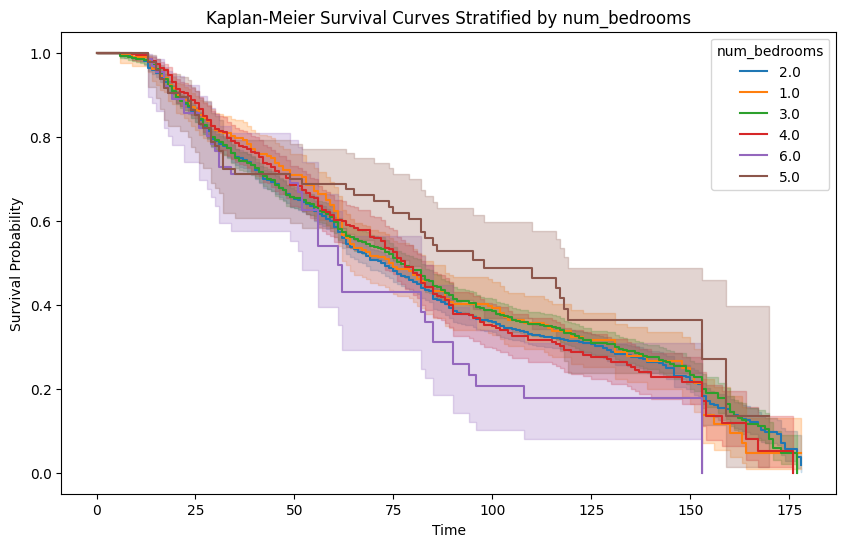

In [15]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for num_bedrooms in data['num_bedrooms'].unique():
    # Select data for each property type
    idx = data['num_bedrooms'] == num_bedrooms
    kmf.fit(data[idx]['time2event'], event_observed=data[idx]['event'], label=num_bedrooms)
    kmf.plot_survival_function()
    print("median for "+str(num_bedrooms),kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified by num_bedrooms')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='num_bedrooms')
plt.show()


median for 0.0 74.0
median for 1.0 85.0


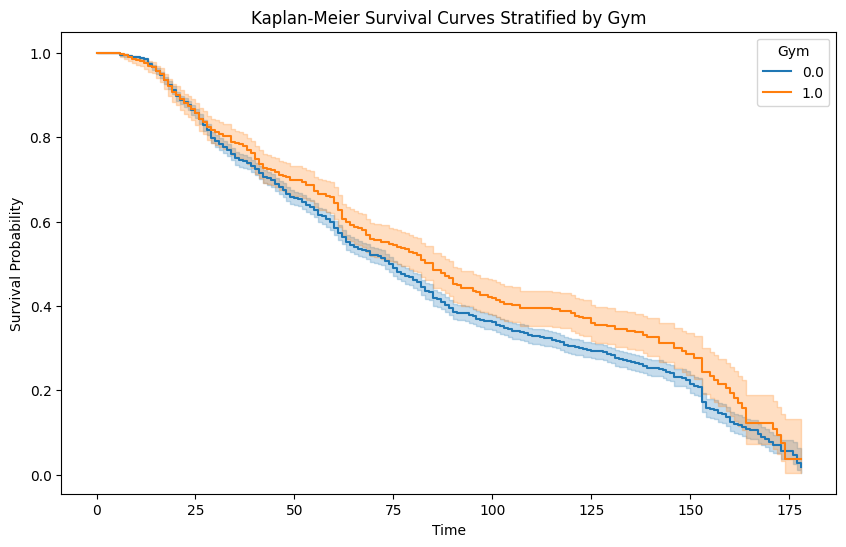

In [62]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for has_gym in data['has_pool'].unique():
    # Select data for each property type
    idx = data['has_pool'] == has_gym
    kmf.fit(data[idx]['time2event'], event_observed=data[idx]['event'], label=has_gym)
    kmf.plot_survival_function()
    print("median for "+str(has_gym),kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified by Gym')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Gym')
plt.show()

In [18]:
df = data
# Calculate the percentiles
percentiles = df['last_price'].quantile([0.25, 0.5, 0.75])

# Function to map percentiles to values 1, 2, 3, or 4
def map_percentile_to_value(last_price):
    if last_price <= percentiles[0.25]:
        return 1
    elif last_price <= percentiles[0.5]:
        return 2
    elif last_price <= percentiles[0.75]:
        return 3
    else:
        return 4

# Add a new column "percentile_column"
df['percentile_column'] = df['last_price'].apply(map_percentile_to_value)

median for 2 73.0
median for 1 66.0
median for 3 75.0
median for 4 90.0


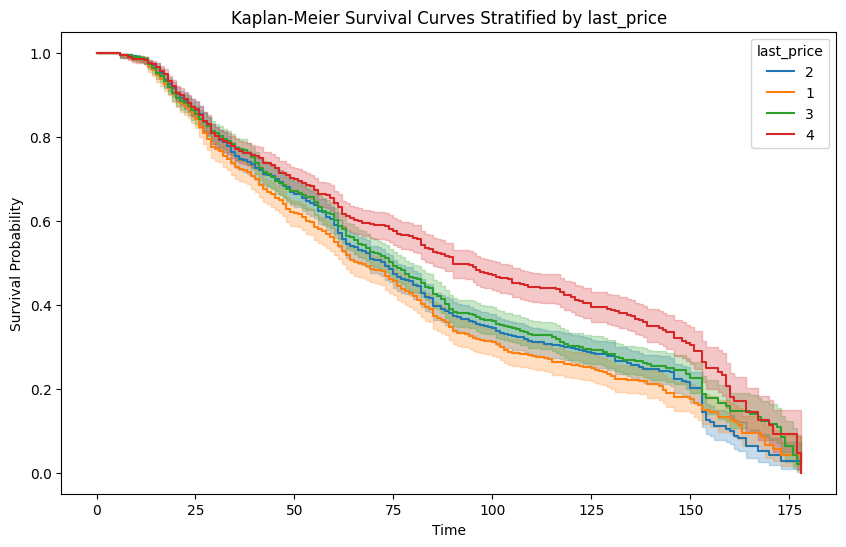

In [19]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    # Select df for each property type
    idx = df['percentile_column'] == percentile_column
    kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=percentile_column)
    kmf.plot_survival_function()
    print("median for "+str(percentile_column),kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified by last_price')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='last_price')
plt.show()

median for 2apartment 73.0
median for 2house 63.0
median for 1apartment 68.0
median for 1house 53.0
median for 3apartment 76.0
median for 3house 72.0
median for 4apartment 100.0
median for 4house 87.0


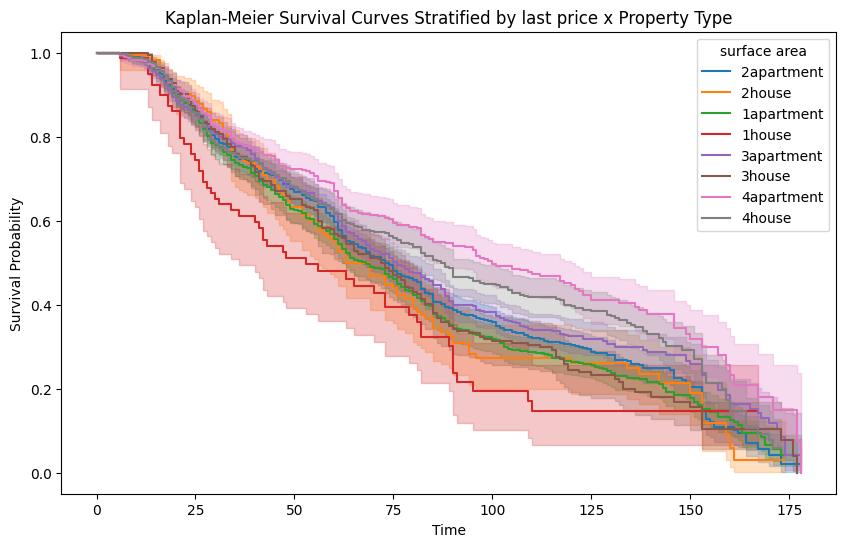

In [20]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    for typex in df['property_type'].unique():
        # Select df for each property type
        idx = (df['percentile_column'] == percentile_column) & (df['property_type'] == typex)
        kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=str(percentile_column)+str(typex))
        kmf.plot_survival_function()
        print("median for "+str(percentile_column)+str(typex),kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified by last price x Property Type')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='surface area')
plt.show()

In [21]:
df = data
# Calculate the percentiles
percentiles = df['last_price'].quantile([0.5])

# Function to map percentiles to values 1, 2, 3, or 4
def map_percentile_to_value(last_price):
    if last_price <= percentiles[0.5]:
        return 1
    else:
        return 2

# Add a new column "percentile_column"
df['percentile_column'] = df['last_price'].apply(map_percentile_to_value)

median for 1apartment 71.0
median for 1house 63.0
median for 2apartment 83.0
median for 2house 80.0


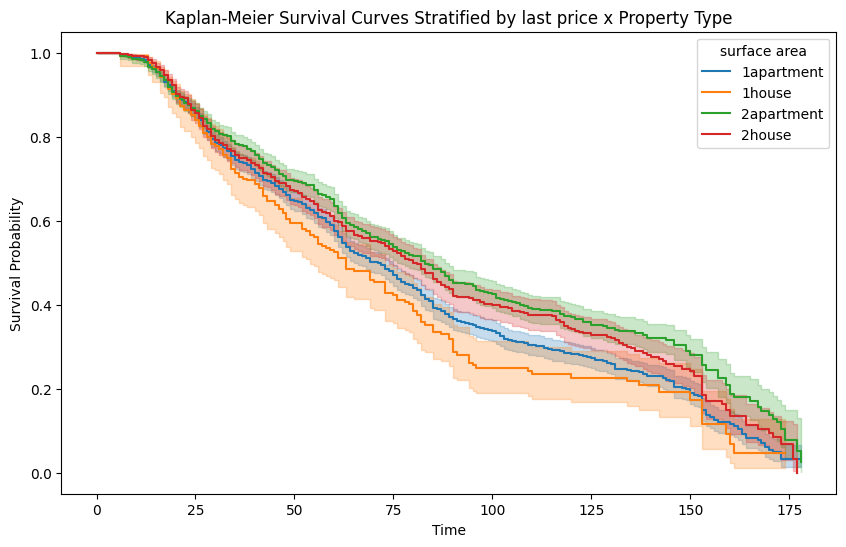

In [22]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    for typex in df['property_type'].unique():
        # Select df for each property type
        idx = (df['percentile_column'] == percentile_column) & (df['property_type'] == typex)
        kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=str(percentile_column)+str(typex))
        kmf.plot_survival_function()
        print("median for "+str(percentile_column)+str(typex),kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified by last price x Property Type')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='surface area')
plt.show()

In [23]:
df = data
# Calculate the percentiles
percentiles = df['surface_total'].quantile([0.5])

# Function to map percentiles to values 1, 2, 3, or 4
def map_percentile_to_value(last_price):
    if last_price <= percentiles[0.5]:
        return 1
    else:
        return 2

# Add a new column "percentile_column"
df['percentile_column'] = df['surface_total'].apply(map_percentile_to_value)

median for 2 80.0
median for 1 73.0


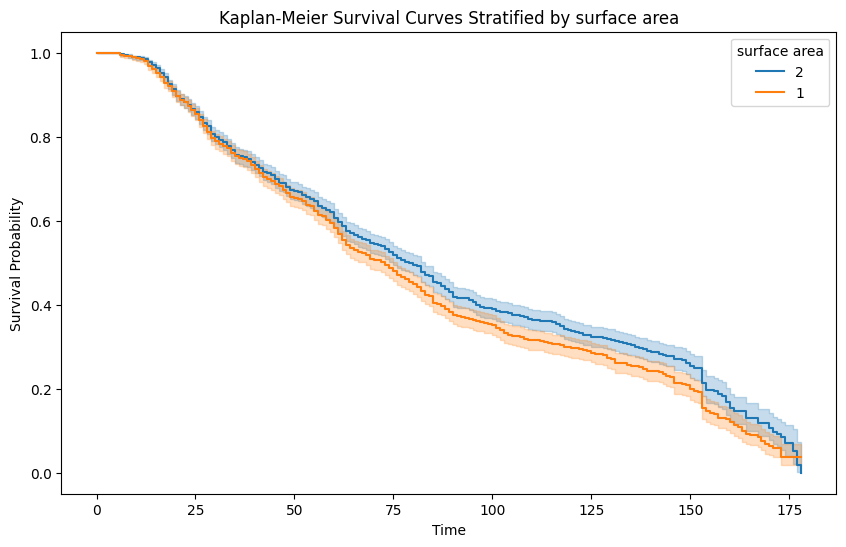

In [24]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    # Select df for each property type
    idx = df['percentile_column'] == percentile_column
    kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=percentile_column)
    kmf.plot_survival_function()
    print("median for "+str(percentile_column),kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified by surface area')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='surface area')
plt.show()

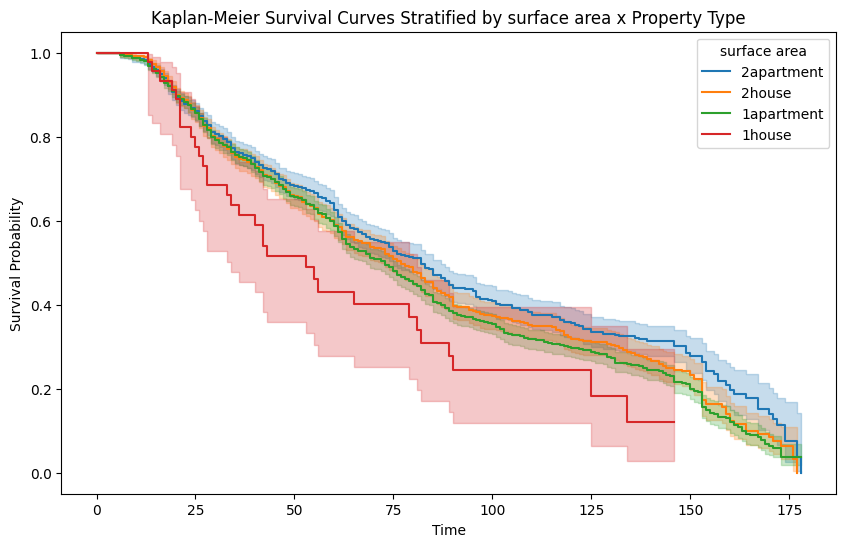

In [ ]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    for typex in df['property_type'].unique():
        # Select df for each property type
        idx = (df['percentile_column'] == percentile_column) & (df['property_type'] == typex)
        kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=str(percentile_column)+str(typex))
        kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves Stratified by surface area x Property Type')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='surface area')
plt.show()

In [25]:
df = data
# Calculate the percentiles
percentiles = df['surface_total'].quantile([0.25, 0.5, 0.75])

# Function to map percentiles to values 1, 2, 3, or 4
def map_percentile_to_value(last_price):
    if last_price <= percentiles[0.25]:
        return 1
    elif last_price <= percentiles[0.5]:
        return 2
    elif last_price <= percentiles[0.75]:
        return 3
    else:
        return 4

# Add a new column "percentile_column"
df['percentile_column'] = df['surface_total'].apply(map_percentile_to_value)

median for 3 75.0
median for 2 76.0
median for 1 68.0
median for 4 82.0


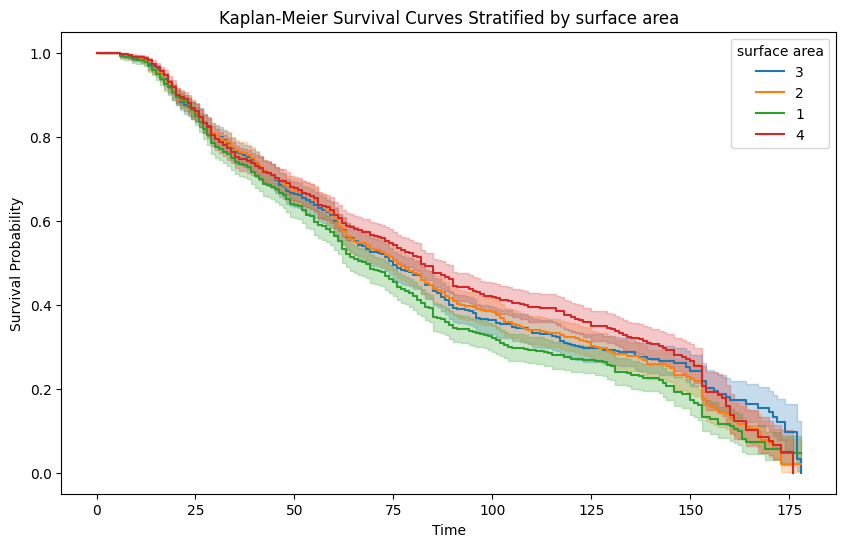

In [26]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in df['percentile_column'].unique():
    # Select df for each property type
    idx = df['percentile_column'] == percentile_column
    kmf.fit(df[idx]['time2event'], event_observed=df[idx]['event'], label=percentile_column)
    kmf.plot_survival_function()
    print("median for "+str(percentile_column),kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified by surface area')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='surface area')
plt.show()

In [54]:
df = data
# Calculate the percentiles for 'last_price' within the subset of 'house' property_type
house_data = df[df['property_type'] == 'house'].copy()
percentiles = house_data['last_price'].quantile([0.25, 0.50, 0.75])

# Function to map percentiles to values 1 or 2
def map_percentile_to_value(last_price):
    #if last_price <= percentiles[0.25]:
        #return 1
    if last_price <= percentiles[0.50]:
        return 1
    #elif last_price <= percentiles[0.75]:
      #return 3
    else:
        return 2

# Apply the mapping function to create the 'percentile_column' for 'house' rows
house_data['percentile_column'] = house_data['last_price'].apply(map_percentile_to_value)


median for 1 69.0
median for 2 87.0


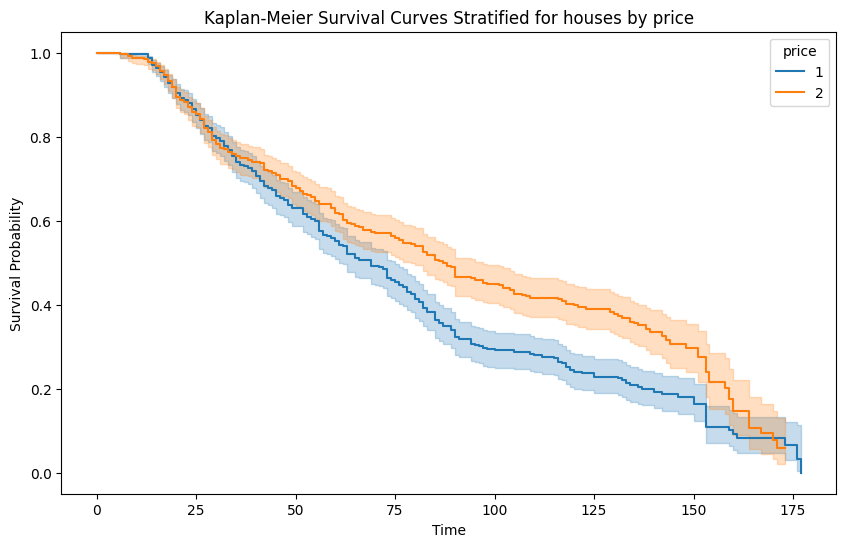

In [55]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in house_data['percentile_column'].unique():
    # Select house_data for each property type
    idx = house_data['percentile_column'] == percentile_column
    kmf.fit(house_data[idx]['time2event'], event_observed=house_data[idx]['event'], label=str(percentile_column))
    kmf.plot_survival_function()
    print("median for "+str(percentile_column),kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified for houses by price')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='price')
plt.show()

In [56]:
df = data
# Calculate the percentiles for 'last_price' within the subset of 'house' property_type
house_data = df[df['property_type'] == 'apartment'].copy()
percentiles = house_data['last_price'].quantile([0.25, 0.50, 0.75])

# Function to map percentiles to values 1 or 2
def map_percentile_to_value(last_price):
    #if last_price <= percentiles[0.25]:
        #return 1
    if last_price <= percentiles[0.50]:
        return 1
    #elif last_price <= percentiles[0.75]:
      #return 3
    else:
        return 2

# Apply the mapping function to create the 'percentile_column' for 'house' rows
house_data['percentile_column'] = house_data['last_price'].apply(map_percentile_to_value)

median for 1 69.0
median for 2 82.0


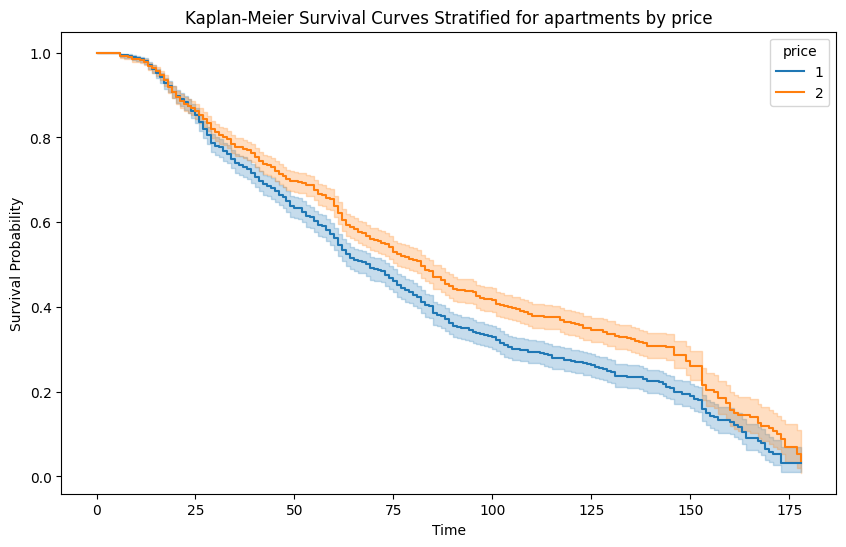

In [57]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in house_data['percentile_column'].unique():
    # Select house_data for each property type
    idx = house_data['percentile_column'] == percentile_column
    kmf.fit(house_data[idx]['time2event'], event_observed=house_data[idx]['event'], label=str(percentile_column))
    kmf.plot_survival_function()
    print("median for "+str(percentile_column),kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified for apartments by price')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='price')
plt.show()

median for 1 66.0
median for 1pool 83.0
median for 2 80.0
median for 2pool 87.0


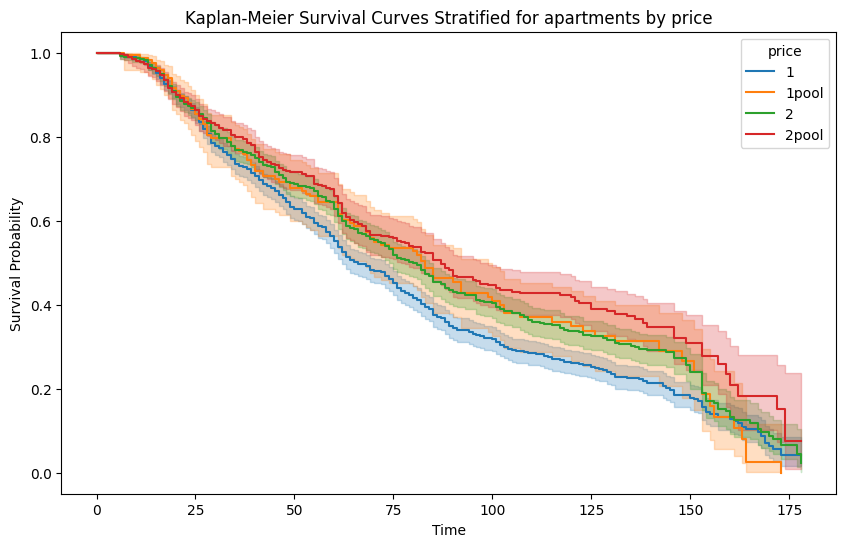

In [61]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plotting the survival function for each property type
plt.figure(figsize=(10, 6))
for percentile_column in house_data['percentile_column'].unique():
    for i in [0,1]:
        # Select house_data for each property type
        idx = ((house_data['percentile_column'] == percentile_column) & (house_data['has_pool']==i))
        kmf.fit(house_data[idx]['time2event'], event_observed=house_data[idx]['event'], label=str(percentile_column)+"pool"*i)
        kmf.plot_survival_function()
        print("median for "+str(percentile_column)+"pool"*i,kmf.median_survival_time_)

plt.title('Kaplan-Meier Survival Curves Stratified for apartments by price')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='price')
plt.show()